In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, Sequential
import matplotlib.pyplot as plt

2024-02-13 20:16:05.409548: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-13 20:16:05.409671: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-13 20:16:05.552918: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
print(train_data.shape)
train_data.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test_data = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
print(test_data.shape)
test_data.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Convert pixel values to floats.

In [4]:
X_train = pd.get_dummies(train_data.iloc[:,1:])
X_train = X_train.values.astype('float32')

y_train = pd.get_dummies(train_data.iloc[:,0])
y_train = y_train.values.astype('int16')

X_test = test_data.values.astype('float32')

# Reshaping the Data
Since each image is 28x28 pixels and one color channel, reshape to these dimensions.  We use a -1 to signify we want the dimension to be calculated for us.

In [5]:
X_train = X_train.reshape(-1, 28, 28,1)
X_test = X_test.reshape(-1,28,28,1)

Let's have a look at this data to see what we are working with.

In [6]:
print('X_train shape: ', X_train.shape)

X_train shape:  (42000, 28, 28, 1)


The training data has 42,000 images that are made up of 28x28pixels(784 in total) with 1 color channel

Let's see what some of the images look like.

# Data Preprocessing

In this case we will simply scale all our greyscale pixel values (0-255) to be between 0 and 1. We can do this by dividing each value in the training and testing sets by 255.0. We do this because smaller values will make it easier for the model to process our values.

In [8]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# Split the data

In [9]:
X=X_train
y=y_train
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.10, random_state=0)

# CNN Architecture

A common architecture for a CNN is a stack of Conv2D and MaxPooling2D layers followed by a few denesly connected layers. To idea is that the stack of convolutional and maxPooling layers extract the features from the image. Then these features are flattened and fed to densly connected layers that determine the class of an image based on the presence of features.

We will start by building the **Convolutional Base**.

In [10]:
model = keras.models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


# # we'll use categorical xent for the loss, and RMSprop as the optimizer
# model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Model Layer Breakdown
**Convolutional Layer (Conv2D):**

* Number of Filters: 32
* Filter Size: (3, 3)
* Activation Function: ReLU (Rectified Linear Unit)
* Input Shape: (28, 28, 1) (28x28 pixels on one color channel)
* Description: This layer performs convolution on the input image. It applies 32 filters of size 3x3 to the input image. The ReLU activation function is applied element-wise to introduce non-linearity to the network.

**Batch Normalization Layer:**

* Description: Batch normalization is applied after the convolutional layer. It normalizes the activations of the previous layer, which helps in stabilizing and accelerating the training process. It reduces the internal covariate shift by normalizing the output of the activation function.

**Max Pooling Layer (MaxPooling2D):**

* Pool Size: (2, 2)
* Description: This layer performs max pooling operation with a pool size of 2x2. It reduces the spatial dimensions of the input image by taking the maximum value within each 2x2 window. This helps in reducing computational complexity and controlling overfitting.


**Other Layers**

* The next set of layers do very similar things but take as input the feature map from the previous layer. They also increase the frequency of filters from 32 to 64. We can do this as our data shrinks in spacial dimensions as it passed through the layers, meaning we can afford (computationally) to add more depth.





In [11]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 11, 11, 64)        256       
 chNormalization)                                                
                                                        

# Adding Dense Layers
So far, we have just completed the **convolutional base**. Now we need to take these extracted features and add a way to classify them. This is why we add the following layers to our model.


In [12]:
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 11, 11, 64)        256       
 chNormalization)                                                
                                                        

We can see that the flatten layer changes the shape of our data so that we can feed it to the 100-node dense layer, follwed by the final output layer of 10 neurons (one for each class).


# Compiling the Model.  

Here's why you might choose this configuration:

**Simplicity:** Using categorical crossentropy without logits simplifies the output layer of your model. Instead of dealing with raw logits, the model outputs probabilities directly, which can be easier to interpret and work with in many cases.

**Compatibility:** Many models and tutorials use categorical crossentropy with probabilities rather than logits. By using this configuration, your code might align more closely with existing examples and documentation.

**Standard Practice:** For many multi-class classification tasks, using categorical crossentropy with probabilities is a standard practice. It's a well-established method that has been proven effective in a wide range of applications.

**Ease of Use:** Specifying the loss function as 'categorical_crossentropy' without logits is straightforward and requires less customization compared to handling logits directly. This simplicity can be advantageous, especially for users who are new to deep learning or want to minimize complexity in their code.

Overall, if your model's output is already in the form of probabilities (after passing through a softmax activation), using categorical crossentropy without logits is a natural choice for measuring the discrepancy between predicted probabilities and true class labels.

"List reasons to use this model: model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])" prompt. ChatGPT, 3.5, OpenAI, 13 Feb. 2024. https://chat.openai.com.

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [15]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val,y_val),
    batch_size=32,
    epochs=10)

Epoch 1/10


I0000 00:00:1707855391.123779      67 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1182/1182 [==============================] - 11s 5ms/step - loss: 0.1256 - accuracy: 0.9616 - val_loss: 0.0699 - val_accuracy: 0.9776
Epoch 2/10
1182/1182 [==============================] - 6s 5ms/step - loss: 0.0511 - accuracy: 0.9846 - val_loss: 0.0641 - val_accuracy: 0.9795
Epoch 3/10
1182/1182 [==============================] - 6s 5ms/step - loss: 0.0370 - accuracy: 0.9886 - val_loss: 0.0500 - val_accuracy: 0.9864
Epoch 4/10
1182/1182 [==============================] - 6s 5ms/step - loss: 0.0296 - accuracy: 0.9910 - val_loss: 0.0530 - val_accuracy: 0.9874
Epoch 5/10
1182/1182 [==============================] - 6s 5ms/step - loss: 0.0229 - accuracy: 0.9930 - val_loss: 0.0557 - val_accuracy: 0.9867
Epoch 6/10
1182/1182 [==============================] - 6s 5ms/step - loss: 0.0229 - accuracy: 0.9930 - val_loss: 0.0509 - val_accuracy: 0.9869
Epoch 7/10
1182/1182 [==============================] - 6s 5ms/step - loss: 0.0192 - accuracy: 0.9935 - val_loss: 0.0637 - val_accuracy: 0.9871
Ep

                  Minimum validation loss: 0.049959417432546616
                   Ending validation loss: 0.06210232526063919


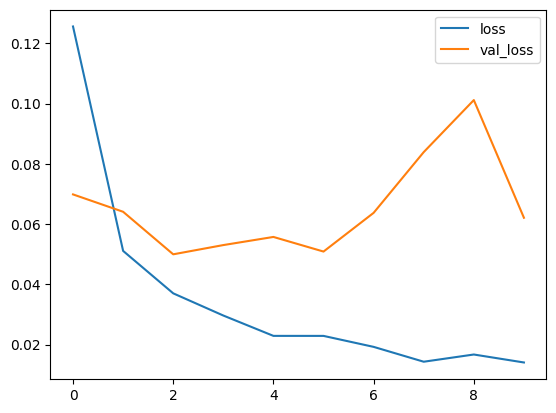

In [16]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
min_val_loss = history_df['val_loss'].min()
ending_val_loss = history_df['val_loss'].iloc[-1]  # Fetching the last val_loss value
print("                  Minimum validation loss: {}".format(min_val_loss))
print("                   Ending validation loss: {}".format(ending_val_loss))

# Making Predictions
To make predictions we simply need to pass an array of data in the form we've specified in the input layer to ```.predict()``` method.

In [17]:
predictions = model.predict(X_val)

132/132 [==============================] - 0s 2ms/step


# Verifying predcitions

The following script had to be commented out since no user input is permitted for Kaggle's submissions.
Uncomment to input a item number and see an image of the data for that item , the model's prediction, and the actual value.

In [18]:
# def show_image(img):
#   plt.figure()
#   plt.imshow(img, cmap=plt.cm.binary)
#   plt.grid(False)
#   plt.show()
  
# def get_number():
#   while True:
#     num = input("Pick a number: ")
#     if num.isdigit():
#       num = int(num)
#       if 0 <= num < 4200:
#         return int(num)
#       else:
#         print("Try again...")
#     else:
#         print("Try again...")

# num = get_number()
# show_image(X_val[num])
# print('Predicated value: ', np.argmax(predictions[num]))
# print('Actual number: ', list(y_val[num]).index(1))

# A sample output of the previous script:

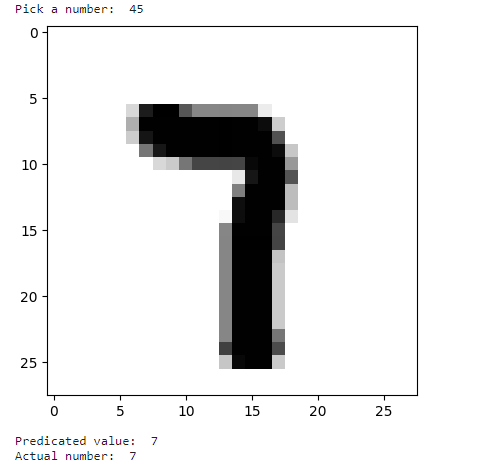

In [19]:
predictions = model.predict(X_test)
X_test.shape

875/875 [==============================] - 2s 2ms/step


(28000, 28, 28, 1)

In [20]:
predictions = np.argmax(predictions, axis = 1)
predictions = pd.Series(predictions,name = "Label")

In [21]:
submission = pd.concat([pd.Series(range(1,28001), name = "ImageId"),predictions],axis = 1)
submission.to_csv("DR.csv", index = False)